In [77]:
import pandas as pd
import numpy as np
import time
import bottleneck as bk
import cProfile
import pstats
import os

In [86]:
def ts_delay(data,period):
    data_cols = data.shape[1]
    pre_data = np.zeros((period,data_cols))
    pre_data[:] = np.nan
    result = np.vstack([pre_data,data[:-period] ])
    return result

def ts_delta(data,period):
    pre_data = ts_delay(data,period)
    delta = data - pre_data
    return delta

class EvaAlpha(object):

    def __init__(self):
        self.data_path = r'F:\bma\project\data'
        self.close = pd.read_csv(os.path.join(self.data_path,'close.csv'),index_col=0)
        self.open = pd.read_csv(os.path.join(self.data_path,'open.csv'),index_col=0)

    def get_ret(self,position):
        # 根据持仓计算收益率
        # todo check一下
        c2c_ret = self.close.diff()/self.close.shift()
        c2o_ret = (self.close - self.open)/self.open
        o2c_ret = (self.open - self.close.shift())/self.close.shift()
        # 区分不同的仓位 持有的 买入的 以及卖出的
        holdPosition = (( ts_delay(position,1) - position)>0) * ts_delay(position,1)
        buyPosition = (( ts_delay(position,1) - position)>0) * (position - ts_delay(position,1))
        sellPosition = (( ts_delay(position,1) - position)<0) * (position - ts_delay(position,1))
        # 不同类型的持仓对应不同的收益率
        holdRet = np.nansum(holdPosition*c2c_ret,axis=1)
        buyRet = np.nansum(buyPosition*c2o_ret,axis=1)
        sellRet = np.nansum(sellPosition*o2c_ret,axis=1)
        ret = holdRet + buyRet + sellRet
        return ret

In [6]:
def insert_nan(data,percent):
    a = data.ravel()
    nan_numbers = round(len(a)*percent)
    index_list = np.random.randint(0,len(a)-1,nan_numbers)
    a[index_list] = np.nan
    
def get_test_data(a,b,per = 0.2):
    test_data = np.random.random((a,b))
    insert_nan(test_data,per)
    return test_data

In [89]:
test_data = get_test_data(3141,3824)
test_data2 = get_test_data(2000,4000)
test_data3 = get_test_data(2000,4000)

In [93]:
test_data = (test_data.T/(bk.nansum(test_data,axis = 1))).T

In [94]:
position = test_data
holdPosition = (ts_delta(position,1)>0) * ts_delay(position,1) + (ts_delta(position,1)<=0) * position 
buyPosition = (ts_delta(position,1)>0) * (ts_delta(position,1))
sellPosition = (ts_delta(position,1)<0) * (ts_delta(position,1))

D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [75]:
holdPosition + buyPosition - position
# 持有的仓位加上增加的仓位等于今日的仓位 减少的仓位已经不体现今天的仓位

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0., nan,  0., ...,  0., nan,  0.],
       [ 0., nan,  0., ...,  0., nan,  0.],
       ...,
       [ 0., nan, nan, ...,  0.,  0.,  0.],
       [ 0., nan, nan, ...,  0., nan,  0.],
       [ 0.,  0.,  0., ...,  0., nan,  0.]])

In [87]:
testalpha = EvaAlpha()

In [97]:
ret = testalpha.get_ret(position)

D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
D:\bma\anaconda\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


In [96]:
bk.nansum(position,axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [98]:
def get_netvalue(ret):
    # 根据收益率计算净值
    net_value = np.cumprod(ret + 1)
    return net_value

In [99]:
net = get_netvalue(ret)

In [100]:
import matplotlib.pyplot as plt

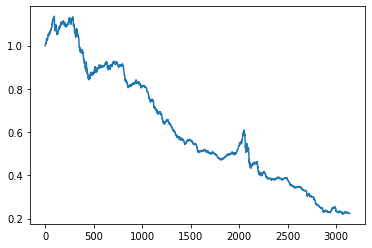

In [101]:
plt.plot(net)

In [104]:
lowBond = np.linspace(0,1,6)

In [106]:
lowBond + lowBond[1]

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2])